In [30]:
from sklearn.datasets import load_iris
from sklearn import tree
from StringIO import StringIO
from IPython.display import Image, display
import graphviz as gv
import pandas as pd
import numpy as np
import pydot

In [36]:
train = pd.read_csv('../../data/titanic/train.csv', 
                    usecols=(1, 2, 4, 5, 6, 7, 9, 11))
train = train.fillna(0)
print train.describe()

train_x = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].as_matrix()
train_y = train['Survived'].as_matrix()

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   23.799293    0.523008    0.381594   32.204208
std      0.486592    0.836071   17.596074    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000    6.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   24.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


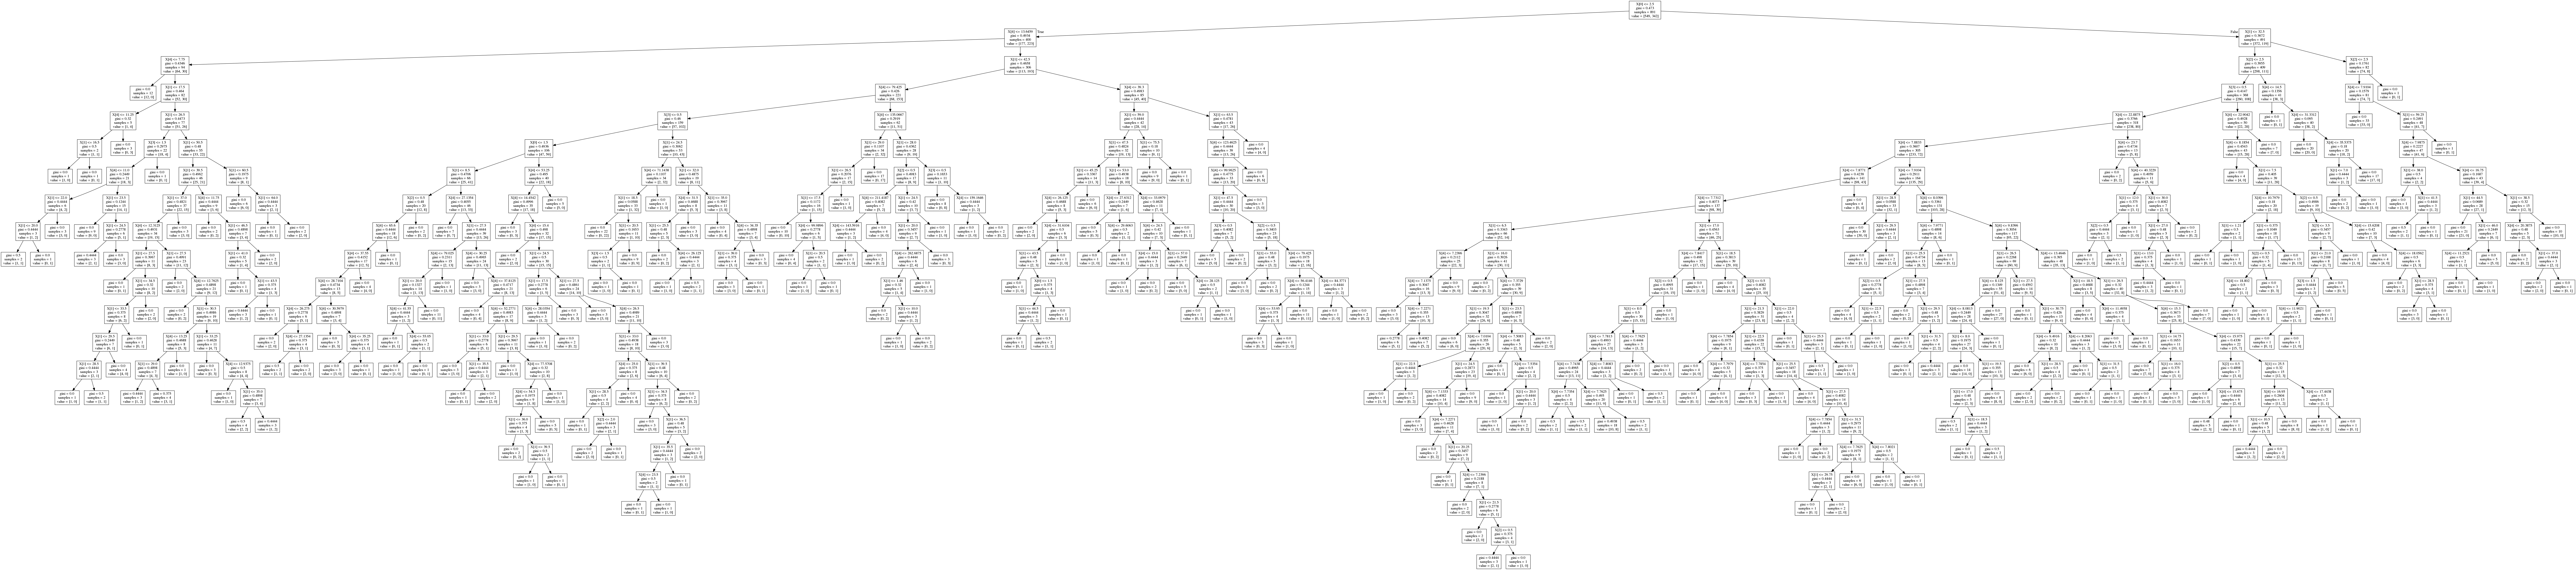

In [37]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)

f = StringIO()
tree.export_graphviz(clf, out_file=f)
graph = pydot.graph_from_dot_data(f.getvalue())[0]
graph.write_png('/tmp/titanic_decision_tree.png')
Image(filename='/tmp/titanic_decision_tree.png')